In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.0/973.0 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pkdarabi/cardetection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cardetection


In [4]:
Image_train = os.path.join(path, 'car/train/images')
os.listdir(Image_train)

['00004_00034_00011_png.rf.2828d9b90a08f69f20d4fe5a94955d6c.jpg',
 'road606_png.rf.4cfc55183329cd1d9c7a9edbf038c76f.jpg',
 '00004_00059_00019_png.rf.6bd94ce764502426dead721f2ee4e40f.jpg',
 'road875_png.rf.71bbad8e5a7500b8a0d189e54346149a.jpg',
 '123e596f-82d1-4baa-a6b8-65b6e2bcf736_jpg.rf.24e8dcde03f21681357f459518e1e6e6.jpg',
 '00005_00016_00023_png.rf.094226e7ecb16eba6b739726f402d0d0.jpg',
 '00003_00044_00026_png.rf.18c38df972c0cbcc687e99af61c7454a.jpg',
 '000859_JPG_jpg.rf.bc06505a8b42c01531ee81367b8c059b.jpg',
 '00014_00010_00007_png.rf.6f418b683f158678a1c07a49917da02e.jpg',
 'FisheyeCamera_1_00146_png.rf.dafec336102ba27c80f1508140e67c37.jpg',
 'FisheyeCamera_1_00195_png.rf.d81d6fb93856dd9de1be47fac85e0bed.jpg',
 '00004_00060_00018_png.rf.99f81912c636c9b743fc50a14db79677.jpg',
 '00004_00018_00009_png.rf.63998ccea0436f9964677e5f628c9f44.jpg',
 '000277_jpg.rf.73d27b826ede76b539a5e895fdddb3e5.jpg',
 '000777_jpg.rf.f418c93d65b3f7c9be35401fae061835.jpg',
 '00008_00011_00013_png.rf.c842a

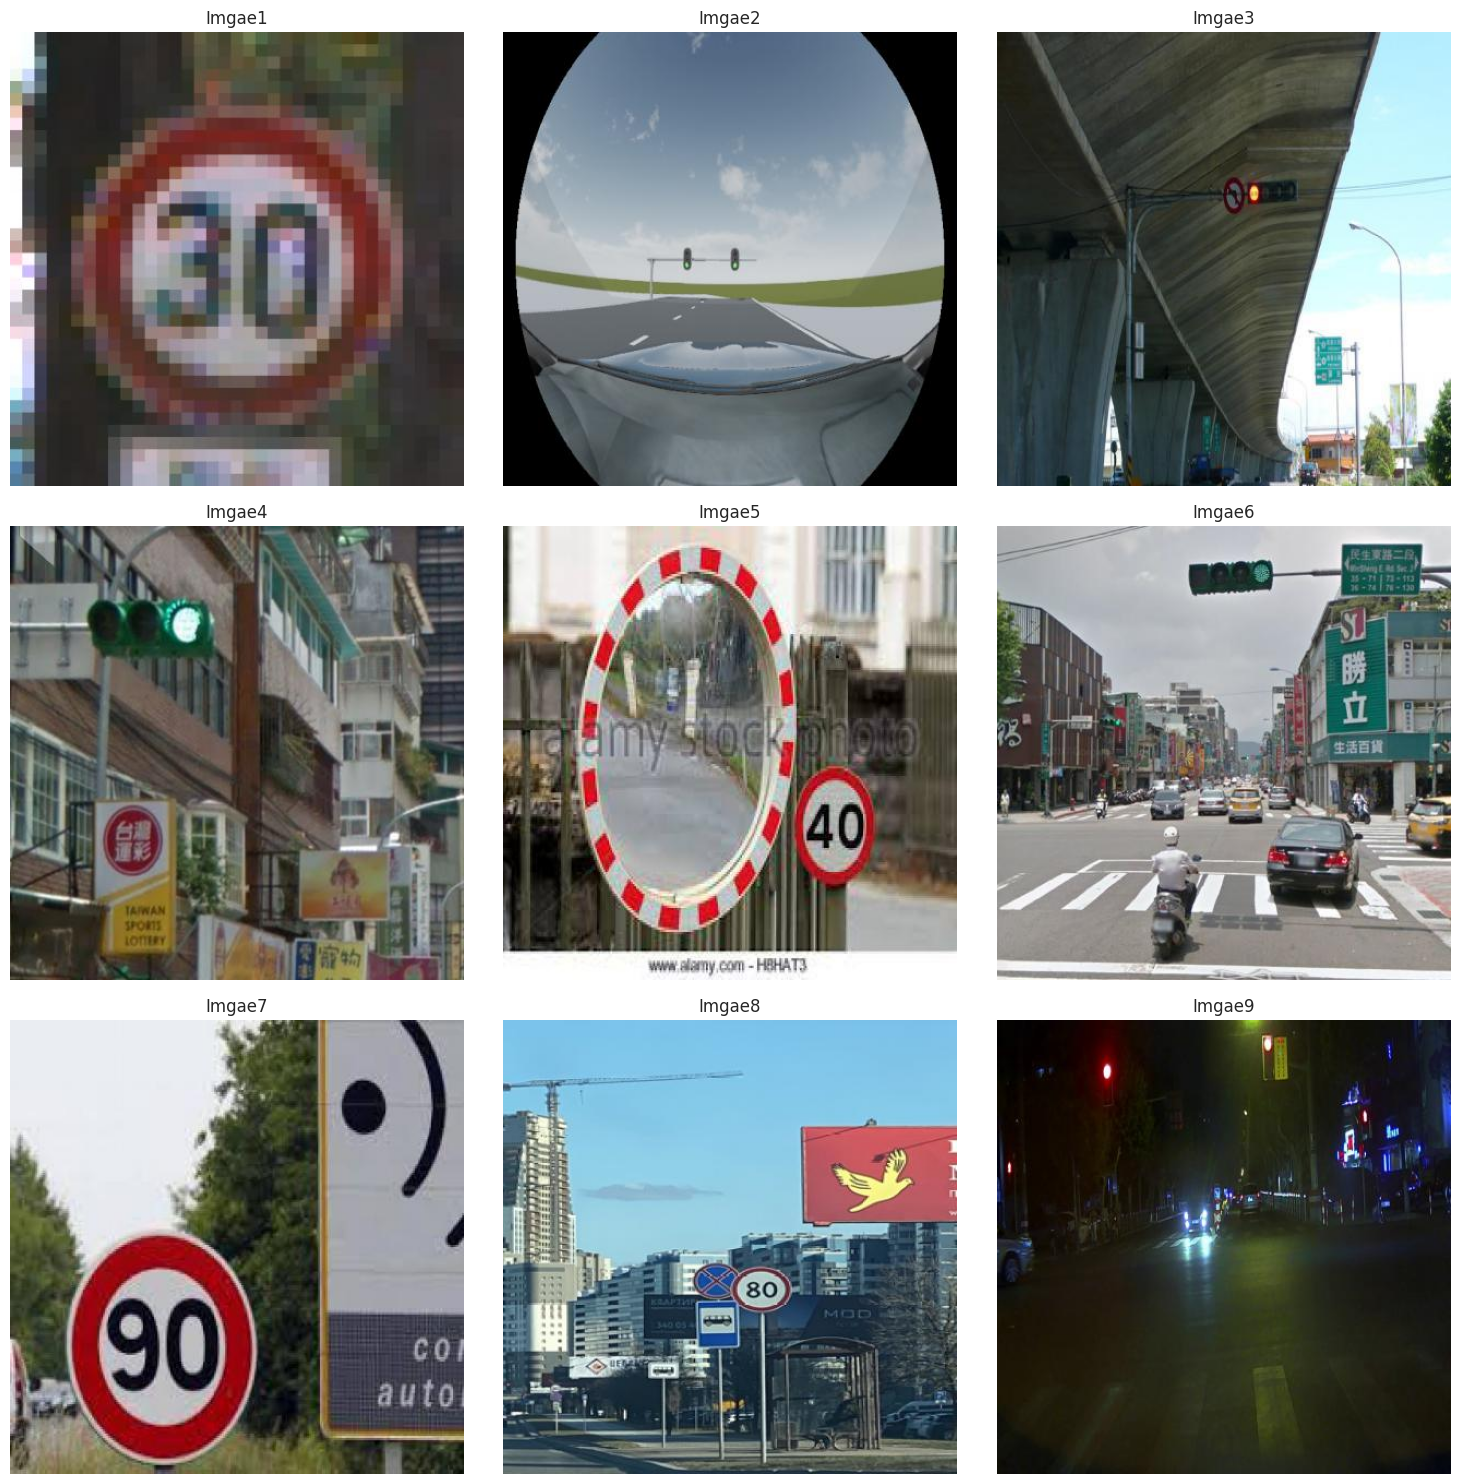

In [5]:
num_samples=9
image_files=os.listdir(Image_train)
random_samples=random.sample(image_files,num_samples)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))


for i in range(num_samples):
  image=random_samples[i]
  ax=axes[i//3,i%3]
  ax.imshow(plt.imread(os.path.join(Image_train,image)))
  ax.set_title('Imgae'+str(i+1))
  ax.axis('off')


plt.tight_layout()
plt.show()

In [6]:
image = cv2.imread(os.path.join(Image_train,"00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg"))
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


In [7]:
image_dir = Image_train
label_dir = os.path.join(path,'car/train/labels')


dataset_pairs = []


for image_file in os.listdir(image_dir):
    if image_file.lower().endswith(('.jpg', '.jpeg', '.png')):
        base_name = os.path.splitext(image_file)[0]
        label_file = base_name + '.txt'

        image_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(label_dir, label_file)


        if os.path.exists(label_path):
            dataset_pairs.append((image_path, label_path))


In [8]:
len(dataset_pairs)

3530

In [9]:
image_dir_v = os.path.join(path,'car/valid/images')
label_dir_v = os.path.join(path,'car/valid/labels')

dataset_pairs_v = []

for image_file in os.listdir(image_dir_v):
    if image_file.lower().endswith(('.jpg', '.jpeg', '.png')):
        label_file = base_name + '.txt'

        image_path = os.path.join(image_dir_v, image_file)
        label_path = os.path.join(label_dir_v, label_file)


        if os.path.exists(label_path):
            dataset_pairs_v.append((image_path, label_path))

In [10]:
len(dataset_pairs_v)

801

In [11]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 369MB/s]


In [12]:
data_yaml_content=f"""
train: {image_dir}
val: {image_dir_v}

nc: 15
names: ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']
"""

In [13]:
yaml_path="yaml.yml"

In [14]:
with open(yaml_path,'w') as f:
  f.write(data_yaml_content)

!cat {yaml_path}


train: /kaggle/input/cardetection/car/train/images
val: /kaggle/input/cardetection/car/valid/images

nc: 15
names: ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']


In [15]:
model.train(
    data='yaml.yml',
    epochs=15,
    imgsz=416,
    batch=16,
    augment=True
)

Ultralytics 8.3.106 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=yaml.yml, epochs=15, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchs

100%|██████████| 755k/755k [00:00<00:00, 118MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 325MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:30<00:00, 116.35it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:06<00:00, 115.98it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15     0.988G     0.8108      3.143      1.085         33        416: 100%|██████████| 221/221 [00:44<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.63it/s]


                   all        801        944      0.202      0.425      0.236      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.21G     0.7517      2.256      1.024         22        416: 100%|██████████| 221/221 [00:37<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.67it/s]

                   all        801        944      0.271      0.571      0.338      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.23G     0.7218      1.961      1.004         22        416: 100%|██████████| 221/221 [00:41<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.63it/s]

                   all        801        944      0.502      0.521      0.467      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.25G     0.6964      1.749      0.989         27        416: 100%|██████████| 221/221 [00:37<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.58it/s]

                   all        801        944      0.494      0.622      0.564      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      1.27G     0.6783      1.508      0.977         25        416: 100%|██████████| 221/221 [00:36<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.63it/s]

                   all        801        944       0.74      0.658      0.711      0.608


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.27G     0.6375      1.327     0.9206         12        416: 100%|██████████| 221/221 [00:36<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  5.12it/s]

                   all        801        944      0.673      0.662      0.715      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15       1.3G     0.6161      1.104     0.9117         13        416: 100%|██████████| 221/221 [00:35<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.80it/s]


                   all        801        944      0.821      0.698      0.794       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.31G     0.6076     0.9374     0.9111         11        416: 100%|██████████| 221/221 [00:34<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.79it/s]

                   all        801        944      0.783      0.763      0.823      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.33G     0.5811     0.8287     0.8968         14        416: 100%|██████████| 221/221 [00:34<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.78it/s]

                   all        801        944      0.872      0.757      0.837      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.34G     0.5753      0.751      0.897         10        416: 100%|██████████| 221/221 [00:35<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.77it/s]

                   all        801        944      0.926       0.77      0.861      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.37G     0.5548     0.6917     0.8853         10        416: 100%|██████████| 221/221 [00:35<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.94it/s]

                   all        801        944      0.913      0.788      0.873      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.38G     0.5443     0.6327     0.8826         10        416: 100%|██████████| 221/221 [00:33<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.67it/s]

                   all        801        944      0.926      0.799      0.877      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15       1.4G     0.5323     0.6027     0.8743         11        416: 100%|██████████| 221/221 [00:33<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.67it/s]

                   all        801        944      0.902      0.827      0.888      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.41G      0.518     0.5562     0.8735         11        416: 100%|██████████| 221/221 [00:33<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.70it/s]

                   all        801        944      0.919      0.816       0.89      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.44G     0.5132     0.5352     0.8716         11        416: 100%|██████████| 221/221 [00:33<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  5.18it/s]

                   all        801        944      0.926      0.825      0.895       0.78



15 epochs completed in 0.175 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.106 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.43it/s]


                   all        801        944      0.924      0.821       0.89      0.773
           Green Light         87        122      0.796      0.557      0.662      0.386
             Red Light         74        108      0.785      0.565      0.664      0.397
       Speed Limit 100         52         52      0.902      0.942       0.95      0.876
       Speed Limit 110         17         17       0.93      0.788       0.91      0.805
       Speed Limit 120         60         60      0.948        0.9      0.977      0.889
        Speed Limit 20         56         56      0.987      0.893       0.97       0.84
        Speed Limit 30         71         74      0.856      0.932      0.958      0.888
        Speed Limit 40         53         55      0.997      0.909       0.95      0.836
        Speed Limit 50         68         71      0.983      0.775      0.907      0.828
        Speed Limit 60         76         76      0.959      0.855      0.916      0.831
        Speed Limit 7

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7da49990b450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0

In [17]:
pre=model.predict(
    source=os.path.join(path,'video.mp4'),
    save=True,
    conf=0.25,
)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/508) /kaggle/input/cardetection/video.mp4: 416x416 1 Stop, 373.0ms
video 1/1 (frame 2/508) /kaggle/input/cardetection/video.mp4: 416x416 (no detections), 90.3ms
video 1/1 (frame 3/508) /kaggle/input/cardetection/video.mp4: 416x416 1 Stop, 99.6ms
video 1/1 (frame 4/508) /kaggle/input/cardetection/video.mp4: 416x416 (no detections), 130.1ms
video 1/1 (frame 5/508) /kaggle/input/cardetection/video.mp4: 416x416 1 Stop, 104.3ms
video 1/1 